In [3]:
##import some things
%matplotlib inline
import numpy as np
from quantities import kHz, ms, nA, s, uV
from neo.io import AxonIO
import matplotlib.pyplot as plt

In [4]:
def plotrawsweep(fname, mylabel, sn):
    import numpy as np
    from quantities import kHz, ms, nA, s, uV
    from neo.io import AxonIO
    import matplotlib.pyplot as plt
    
    r = AxonIO(filename=fname)
    block = r.read()[0] # read the entire file > a Block

    #grab sweep
    asig = block.segments[sn].analogsignals[0]
    times = asig.times.rescale('s').magnitude
    #set start time to zero
    times = times-times[0]
    #asig = asig.rescale('pA').magnitude
    plt.plot(times, asig, label=mylabel)

In [5]:
def plotsweeps(fname, mylabel, rawbg, submean):
    import numpy as np
    from quantities import kHz, ms, nA, s, uV
    from neo.io import AxonIO
    import matplotlib.pyplot as plt  
    
    r = AxonIO(filename=fname)
    block = r.read()[0] # read the entire file > a Block
    
    def grabsweep(bl, nsweep, sm):
        asig = bl.segments[nsweep].analogsignals[0]
        if(sm):
            ##how many timepoints to include in baseline
            baseline = 10000
            asig = asig - np.mean(asig[:baseline])
        times = asig.times.rescale('s').magnitude
        #set start time to zero
        times = times-times[0]
        #asig = asig.rescale('pA').magnitude
        plt.plot(times, asig, alpha=0.3, color='grey')
    
    if(rawbg):
        #grab sweeps
        #sweep 1
        grabsweep(block, 0, submean)
        grabsweep(block, 1, submean)
        grabsweep(block, 2, submean)

    #average 3 sweeps
    avg = np.mean([seg.analogsignals[0] for seg in block.segments], axis=0)
    if(submean):
        baseline = 1000
        avg = avg - np.mean(avg[:baseline])
    times = block.segments[0].analogsignals[0].times.rescale('s').magnitude
    times = times-times[0]
    #print(avg)
    plt.plot(times, avg, label = mylabel)

# 16-01-20

In [25]:
date = '160120'
datef2 = '1612'

##read in the file so we can see which SAC recording we are looking at
f = open('../data/ChatCreChR2/' + date + '.m')
text = f.read()
print(text)

160120 p57 ChatCre/Chr2 mouse

Light Dissection 
50mL ACSF with: 
   20uL DNQX
   50uL AP5
   100uL LAP4
   12.5uL GABAzine

   
No orientation on the retina

Patch SACs, fill with ALexa 594, and then stim at diff dendritic locations 
455nm LED 


SAC1
7.2mohm pipette
CM = 14
Rm = 550M
Ra 67 M

%centered on soma
%000 shutter was closed
showSpots_notCentered('num_trials',3,'delay_time',2,'up_time',1,'down_time',7,'radius',333);

%001
showSpots_notCentered('num_trials',3,'delay_time',2,'up_time',1,'down_time',7,'radius',333);

%002
showSpots_notCentered('num_trials',3,'delay_time',2,'up_time',1,'down_time',7,'radius',83);

%003 centered on soma but focused on dendrites
showSpots_notCentered('num_trials',3,'delay_time',2,'up_time',1,'down_time',7,'radius',83);

%005 centered on the end of the dendrites
showSpots_notCentered('num_trials',3,'delay_time',2,'up_time',1,'down_time',7,'radius',83);

%006 centered on the end of the dendrites hp = +12
%responses are not synched. first one happend

## Overview

### SAC1
mostly a loss because timing was not working correctly, so triggering didn't go properly.

### SAC2
can compare stim at soma and stim at dendrites, both focus dendrites on same focal plane at same holding potential (-60)
Trials:  
15 16

### SAC3
1. Compare CSFS to CSFD (trials 20 & 21)  

2. CSFD at diff holding potentials.  
Trials:  
21 (-60mV)  
22 (0mV)  
23 (20mV)  
24 (40mV)  
25 (-20mV)  

### SAC4
a complete loss. We only recorded once and it was already dying.

### SAC5
Compare CDFD at different holding potentials.
Trials:  
33 (40mV)  
32 (20mV)  
30 (0mV)
34 (-20mV)  
29 (-60mV)  


## Large radius spot

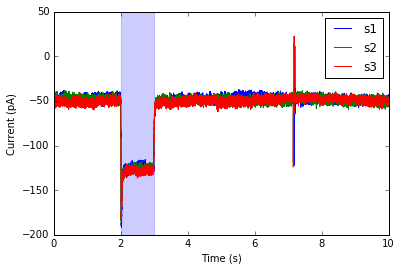

In [26]:
import matplotlib.pyplot as plt   
condition = '0019'
fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'

fig = plt.figure()
plotrawsweep(fname, mylabel = 's1', sn=0)
plotrawsweep(fname, mylabel = 's2', sn=1)
plotrawsweep(fname, mylabel = 's3', sn=2)
plt.legend()

##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')

## Methodology Controls

### Intra-trial consistancy
Three sweeps from the same trial

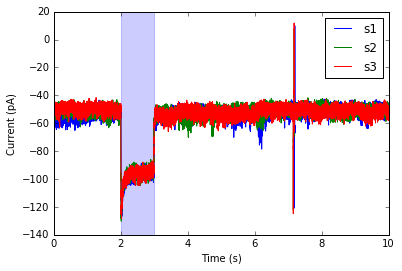

In [5]:
import matplotlib.pyplot as plt   
condition = '0020'
fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'

fig = plt.figure()
plotrawsweep(fname, mylabel = 's1', sn=0)
plotrawsweep(fname, mylabel = 's2', sn=1)
plotrawsweep(fname, mylabel = 's3', sn=2)
plt.legend()

##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')

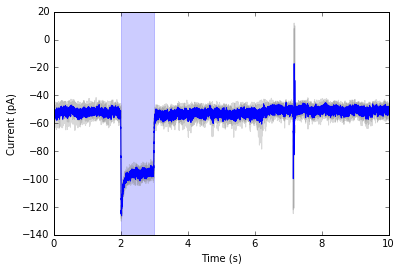

In [6]:
fig, ax = plt.subplots(1, 1)
plotsweeps(fname, mylabel = 's1',rawbg=1, submean=0)

##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')

## SAC2

CSFD vs CDFD - trials 15 and 16

/Users/vgd/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


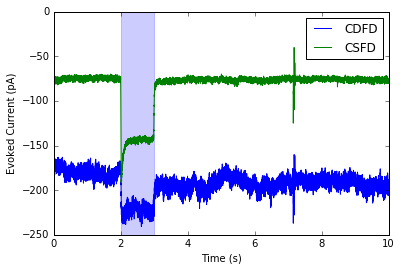

In [7]:
sac2 = np.array([['16', 'CDFD'],
                ['15', 'CSFD']])

fig = plt.figure()
for t in range(len(sac2)): #[29, 34, 30, 32, 33]: 
    condition = '00' + str(sac2[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel = str(sac2[t,1]), rawbg=0, submean=0)
    plt.label = ('test')
    
##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

fig.show()
plt.legend()

plt.xlabel('Time (s)')
plt.ylabel('Evoked Current (pA)')


## SAC3

in SAC3, we can compare CSFS to CSFD (trials 20 & 21)

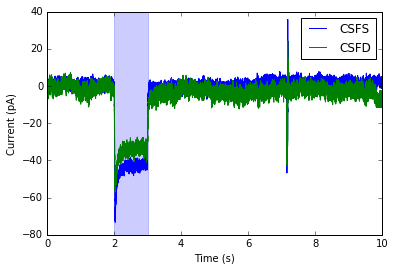

In [28]:
sac3 = np.array([[20, 'CSFS'],
                [21, 'CSFD']])

fig = plt.figure()
for t in range(len(sac3)):
    condition = '00' + str(sac3[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel=str(sac3[t,1]), rawbg=0, submean=1)
#plt.ylim([-300, 300]) 

##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')


fig.show()
plt.legend()

plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')

in SAC3, we were able to record at many holding potentials for center at soma focus on dendrites. These are trials 21-25

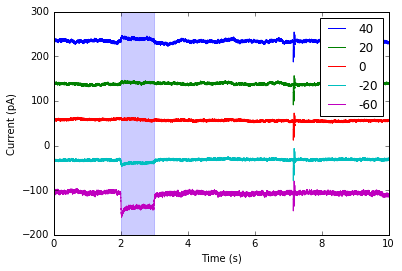

In [9]:
sac3 = np.array([[24, 40],
                [23, 20],
                [22, 0],
                [25, -20],
                [21, -60]])

fig = plt.figure()
for t in range(len(sac3)): #[21,25,22, 23, 24]
    condition = '00' + str(sac3[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel=str(sac3[t,1]), rawbg=0, submean=0)
#plt.ylim([-300, 300]) 

##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')


fig.show()
plt.legend()

plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')

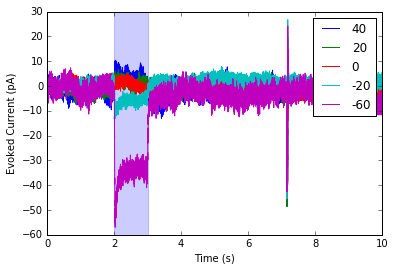

In [10]:
fig = plt.figure()
for t in range(len(sac3)): #[21,25,22, 23, 24]: 
    condition = '00' + str(sac3[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel=str(sac3[t,1]), rawbg=0, submean=1)
#plt.ylim([0, 2]) 

##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

fig.show()
plt.legend()

plt.xlabel('Time (s)')
plt.ylabel('Evoked Current (pA)')

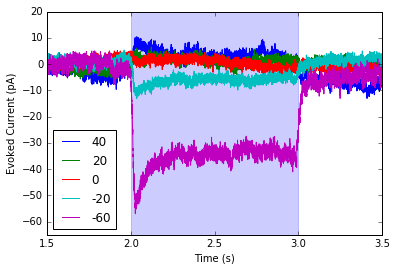

In [11]:
fig = plt.figure()
for t in range(len(sac3)): 
    condition = '00' + str(sac3[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel = str(sac3[t,1]), rawbg=0, submean=1)
plt.xlim([1.5, 3.5]) 
plt.ylim([-65, 20])
##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

fig.show()
plt.legend(loc=3)

plt.xlabel('Time (s)')
plt.ylabel('Evoked Current (pA)')

Nagel et al 2005  
<img src="./img/chriv.png">

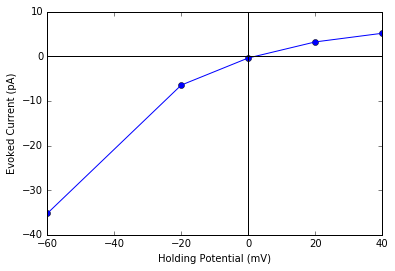

In [12]:
##plot an IV curve for sac5:

ievoked_sac3 = np.zeros(len(sac3))

for t in range(len(sac3)):
    condition = '00' + str(sac3[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    vhold = sac3[t,1]
    ##readin signal
    r = AxonIO(filename=fname)
    block = r.read()[0] # read the entire file > a Block
    avg = np.mean([seg.analogsignals[0] for seg in block.segments], axis=0)
    baseline = 10000
    avg = avg - np.mean(avg[:baseline])
    times = block.segments[0].analogsignals[0].times.rescale('s').magnitude
    times = times-times[0]  
    ##calculate evoked current (mean over window at 2seconds - 3seconds)
    dt = 1e-4
    ie = np.mean(avg[int(2./dt):int(3./dt)])
    ievoked_sac3[t] = ie
                            

plt.plot(sac3[:,1], ievoked_sac3, 'bo')
plt.plot(sac3[:,1], ievoked_sac3)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.xlabel('Holding Potential (mV)')
plt.ylabel('Evoked Current (pA)')


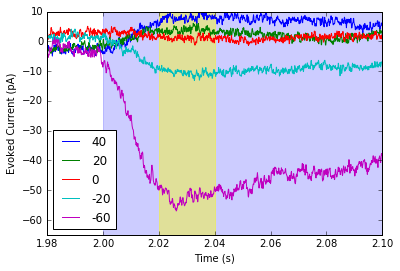

In [13]:
fig = plt.figure()
for t in range(len(sac3)):
    condition = '00' + str(sac3[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel = str(sac3[t,1]), rawbg=0, submean=1)
plt.xlim([1.98, 2.1]) 
plt.ylim([-65, 10])

##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

##show limits of evoked current
plt.axvspan(2.02, 2.04, alpha=0.4, color='yellow')

fig.show()
plt.legend(loc=3)

plt.xlabel('Time (s)')
plt.ylabel('Evoked Current (pA)')

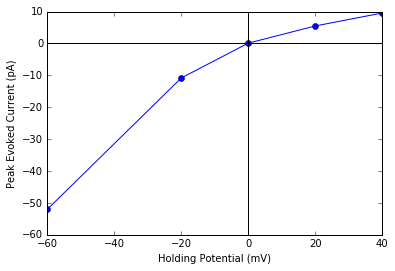

In [15]:
ipevoked_sac3 = np.zeros(len(sac3))

for t in range(len(sac3)):  
    condition = '00' + str(sac3[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    vhold = sac3[t,1]
    ##readin signal
    r = AxonIO(filename=fname)
    block = r.read()[0] # read the entire file > a Block
    avg = np.mean([seg.analogsignals[0] for seg in block.segments], axis=0)
    baseline = 10000
    avg = avg - np.mean(avg[:baseline])
    times = block.segments[0].analogsignals[0].times.rescale('s').magnitude
    times = times-times[0]  
    ##calculate evoked current (mean over window at 2seconds - 3seconds)
    dt = 1e-4
    ie = np.mean(avg[int(2.02/dt):int(2.04/dt)])
    ipevoked_sac3[t] = ie
                            

plt.plot(sac3[:,1], ipevoked_sac3, 'bo')
plt.plot(sac3[:,1], ipevoked_sac3)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('Holding Potential (mV)')
plt.ylabel('Peak Evoked Current (pA)')

    #    plotsweeps(fname, mylabel = str(sac5[t,1]), rawbg=0, submean=1)

### CSFS vs CDFD

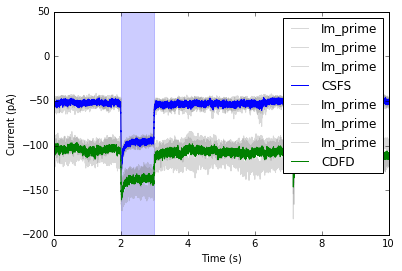

In [16]:
compare = np.array([[20, 'CSFS'],
                [21, 'CDFD']])

fig = plt.figure()
for t in range(len(compare)): #[29, 34, 30, 32, 33]: 
    condition = '00' + str(compare[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel = str(compare[t,1]), rawbg=1, submean=0)
    plt.label = ('test')
    
##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

fig.show()
plt.legend()

plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')

# SAC5
In SAC5, we were able to record CDFD at many different holding potentials.  

Trials:  
28 CS FS (-60mV)  
29 CD FD (-60mV)  
30 CD FD (0mV)   
32 CD FD (20mV)  
33 CD FD (40mV)
34 CD FD (-20mV)
35 CD FD (-60mV)

Compare same case CDFD at beginning and end of experiment

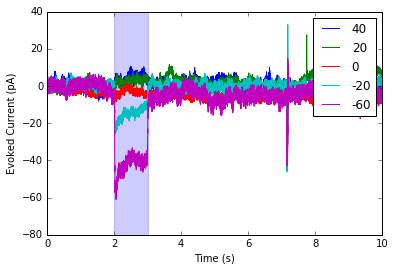

In [17]:
sac5 = np.array([[33, 40],
                [32, 20],
                [30, 0],
                [34, -20],
                [29, -60]])

fig = plt.figure()
for t in range(len(sac5)): #[29, 34, 30, 32, 33]: 
    condition = '00' + str(sac5[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel = str(sac5[t,1]), rawbg=0, submean=1)
    plt.label = ('test')
    
##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

fig.show()
plt.legend()

plt.xlabel('Time (s)')
plt.ylabel('Evoked Current (pA)')

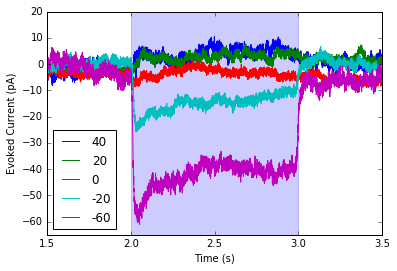

In [18]:
fig = plt.figure()
for t in range(len(sac5)):  #[29, 34, 30, 32, 33]: 
    condition = '00' + str(sac5[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel = str(sac5[t,1]), rawbg=0, submean=1)
plt.xlim([1.5, 3.5]) 
plt.ylim([-65, 20])
##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

fig.show()
plt.legend(loc=3)

plt.xlabel('Time (s)')
plt.ylabel('Evoked Current (pA)')

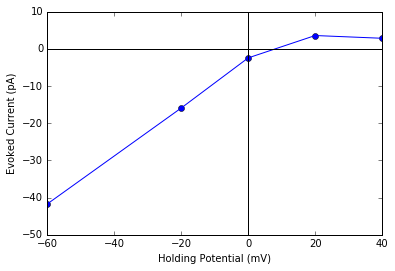

In [19]:
##plot an IV curve for sac5:

ievoked_sac5 = np.zeros(len(sac5))

for t in range(len(sac5)): #[29, 34, 30, 32, 33]: 
    condition = '00' + str(sac5[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    vhold = sac5[t,1]
    ##readin signal
    r = AxonIO(filename=fname)
    block = r.read()[0] # read the entire file > a Block
    avg = np.mean([seg.analogsignals[0] for seg in block.segments], axis=0)
    baseline = 10000
    avg = avg - np.mean(avg[:baseline])
    times = block.segments[0].analogsignals[0].times.rescale('s').magnitude
    times = times-times[0]  
    ##calculate evoked current (mean over window at 2seconds - 3seconds)
    dt = 1e-4
    ie = np.mean(avg[int(2./dt):int(3./dt)])
    ievoked_sac5[t] = ie
                            

plt.plot(sac5[:,1], ievoked_sac5, 'bo')
plt.plot(sac5[:,1], ievoked_sac5)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.xlabel('Holding Potential (mV)')
plt.ylabel('Evoked Current (pA)')

    #    plotsweeps(fname, mylabel = str(sac5[t,1]), rawbg=0, submean=1)

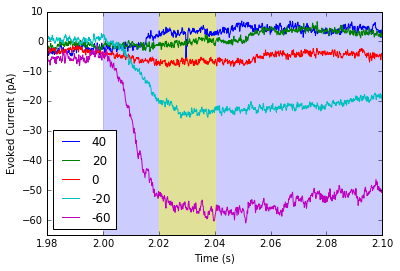

In [20]:
fig = plt.figure()
for t in range(len(sac5)):  #[29, 34, 30, 32, 33]: 
    condition = '00' + str(sac5[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel = str(sac5[t,1]), rawbg=0, submean=1)
plt.xlim([1.98, 2.1]) 
plt.ylim([-65, 10])

##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

##show limits of evoked current
plt.axvspan(2.02, 2.04, alpha=0.4, color='yellow')

fig.show()
plt.legend(loc=3)

plt.xlabel('Time (s)')
plt.ylabel('Evoked Current (pA)')

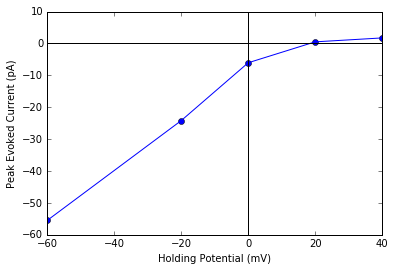

In [21]:
##plot an IV curve for sac5:

ipevoked_sac5 = np.zeros(len(sac5))

for t in range(len(sac5)): #[29, 34, 30, 32, 33]: 
    condition = '00' + str(sac5[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    vhold = sac5[t,1]
    ##readin signal
    r = AxonIO(filename=fname)
    block = r.read()[0] # read the entire file > a Block
    avg = np.mean([seg.analogsignals[0] for seg in block.segments], axis=0)
    baseline = 10000
    avg = avg - np.mean(avg[:baseline])
    times = block.segments[0].analogsignals[0].times.rescale('s').magnitude
    times = times-times[0]  
    ##calculate evoked current (mean over window at 2seconds - 3seconds)
    dt = 1e-4
    ie = np.mean(avg[int(2.02/dt):int(2.04/dt)])
    ipevoked_sac5[t] = ie
                            

plt.plot(sac5[:,1], ipevoked_sac5, 'bo')
plt.plot(sac5[:,1], ipevoked_sac5)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('Holding Potential (mV)')
plt.ylabel('Peak Evoked Current (pA)')

    #    plotsweeps(fname, mylabel = str(sac5[t,1]), rawbg=0, submean=1)

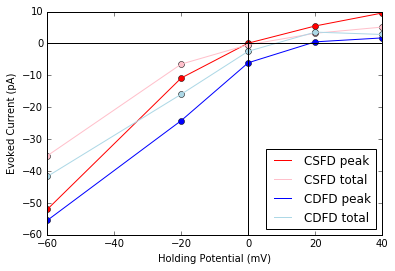

In [55]:
#Summary IV Curves:   

plt.plot(sac3[:,1], ipevoked_sac3, 'bo', color='red')
plt.plot(sac3[:,1], ipevoked_sac3, label= 'CSFD peak', color='red')    

plt.plot(sac3[:,1], ievoked_sac3, 'bo', color='pink')
plt.plot(sac3[:,1], ievoked_sac3, label= 'CSFD total', color='pink')

plt.plot(sac5[:,1], ipevoked_sac5, 'bo', color='blue')
plt.plot(sac5[:,1], ipevoked_sac5, label= 'CDFD peak', color='blue')

plt.plot(sac5[:,1], ievoked_sac5, 'bo', color='lightblue')
plt.plot(sac5[:,1], ievoked_sac5, label= 'CDFD total', color='lightblue')

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('Holding Potential (mV)')
plt.ylabel('Evoked Current (pA)')

plt.legend(loc=4)

    #    plotsweeps(fname, mylabel = str(sac5[t,1]), rawbg=0, submean=1)

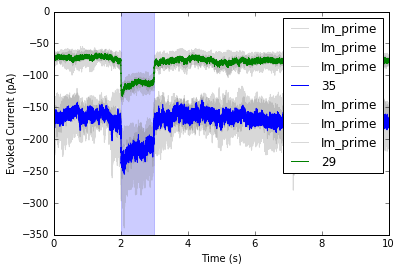

In [22]:
fig = plt.figure()
#plt.ioff()
for t in [35,29]: 
    condition = '00' + str(t)
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel = str(t), rawbg=1, submean=0)
#plt.ion()
#plt.ylim([0, 2]) 

##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')


fig.show()
plt.legend()

plt.xlabel('Time (s)')
plt.ylabel('Evoked Current (pA)')

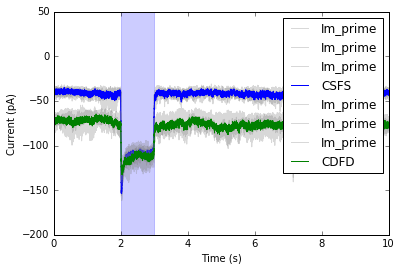

In [23]:
compare = np.array([[28, 'CSFS'],
                [29, 'CDFD']])

fig = plt.figure()
for t in range(len(compare)): #[29, 34, 30, 32, 33]: 
    condition = '00' + str(compare[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel = str(compare[t,1]), rawbg=1, submean=0)
    plt.label = ('test')
    
##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

fig.show()
plt.legend()

plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')

## CSFD(cell3) vs CDFD(cell5)

Compare these two conditions by comparing cells 3 and 5.  

Cell 3  
%020 - center at soma focus on soma
showSpots('num_trials',3,'delay_time',2,'up_time',1,'down_time',7,'radius',83,'spot_color',255);

%021 - center at soma focus on dendrites - holding at -60
showSpots('num_trials',3,'delay_time',2,'up_time',1,'down_time',7,'radius',83,'spot_color',255);  

Cell 5   

%28 - center at soma focus on soma - hold -60 - turned off ir light during
%sweep 1
showSpots('num_trials',3,'delay_time',2,'up_time',1,'down_time',7,'radius',83,'spot_color',255);

%29 - center at dendrite focus dendrite - hold -60
showSpots('num_trials',3,'delay_time',2,'up_time',1,'down_time',7,'radius',83,'spot_color',255);

### Compare cells in same condition (CSFS at -60)

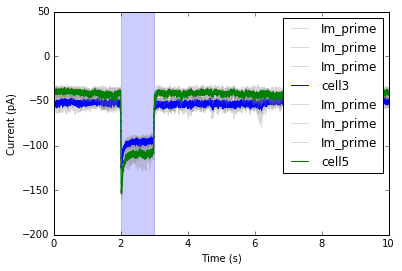

In [24]:
compare = np.array([[20, 'cell3'],
                [28, 'cell5']])

fig = plt.figure()
for t in range(len(compare)): #[29, 34, 30, 32, 33]: 
    condition = '00' + str(compare[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel = str(compare[t,1]), rawbg=1, submean=0)
    plt.label = ('test')
    
##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

fig.show()
plt.legend()

plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')

### Compare cells in (CDFD at -60)

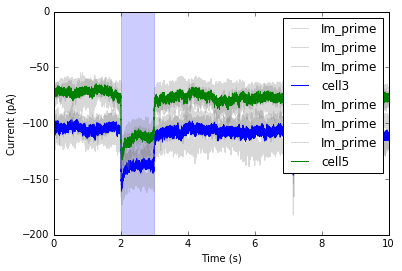

In [25]:
compare = np.array([[21, 'cell3'],
                [29, 'cell5']])

fig = plt.figure()
for t in range(len(compare)): #[29, 34, 30, 32, 33]: 
    condition = '00' + str(compare[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel = str(compare[t,1]), rawbg=1, submean=0)
    plt.label = ('test')
    
##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

fig.show()
plt.legend()

plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')

# 16-01-22

In [26]:
date = '160122'
datef2 = '16122'

##read in the file so we can see which SAC recording we are looking at
f = open('../data/ChatCreChR2/' + date + '.m')
text = f.read()
print(text)

160120 p9 ChatCre/Chr2 mouse

Light Dissection 
50mL ACSF with: 
   20uL DNQX
   50uL AP5
   100uL LAP4
   12.5uL GABAzine

   
No orientation on the retina

Patch SACs, fill with ALexa 594, and then stim at diff dendritic locations 
455nm LED 


SAC1
4.8mohm pipette
CM = 12pF
Rm = 550M
Ra = 180 M

%%experiment:
%center soma, focus soma, radius 83, hold at -60
%center soma, focus soma, radius 40, hold at -60
%center soma, focus soma, radius 40, hold at 0
%center soma, focus soma, radius 40, hold at +20
%center soma, focus dendrites, radius 40, hold at -60
%center soma, focus dendrites, radius 40, hold at 0
%center soma, focus dendrites, radius 40, hold at +20
%center dist dendrites, focus dist dendrites, radius 40, hold at -60
%center dist dendrites, focus dist dendrites, radius 40, hold at 0
%center dist dendrites, focus dist dendrites, radius 40, hold at +20


%000-003 are trials for debugging
%004 - %center soma, focus soma, radius 42, hold at -60
showSpots_notCentered('num_trials',

A few things are incorrect about this text file. It should say p59, and the date should be 1/22 not 1/20. These were clearly typos.  

Also, here we were using a spotsize of radius 42, which corresponds to a 25micron radius.

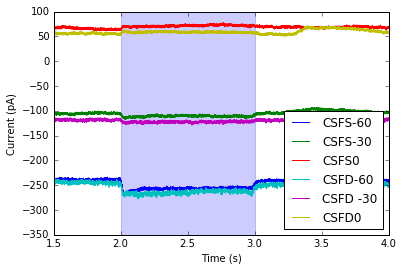

In [82]:
sac1 = np.array([['04', 'CSFS' ,'-60'],
                ['06', 'CSFS' ,'-30'],
                ['05', 'CSFS' ,'0'],
                ['07', 'CSFD' ,'-60'],
                ['09', 'CSFD' ,' -30'],
                ['08', 'CSFD' ,'0']])

fig = plt.figure()
for t in range(len(sac1)):
    condition = '0' + str(sac1[t,0])
    fname = '../data/ChatCreChR2/' + date + ' ChR2ChatCrep59/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel = str(sac1[t,1])+str(sac1[t,2]), rawbg=0, submean=0)
    plt.label = ('test')
    
##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

plt.xlim([1.5, 4]) 
#plt.ylim([-40, 20])

fig.show()
plt.legend(loc=4)

plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')

Note the baseline current is VERY different for each of these three trials. (We've changed the holding current so this is not surprising) but WITHIN each holding potential, we have strong similarity. Note the CSFS and CSFD cases don't seem too different.

## IV Curves

In [83]:
ievoked_sac1 = np.zeros(len(sac1))
ipevoked_sac1 = np.zeros(len(sac1))

for t in range(len(sac1)): 
    condition = '0' + str(sac1[t,0])
    fname = '../data/ChatCreChR2/' + date + ' ChR2ChatCrep59/' + datef2 + condition + '.abf'
    vhold = sac1[t,2]
    ##readin signal
    r = AxonIO(filename=fname)
    block = r.read()[0] # read the entire file > a Block
    avg = np.mean([seg.analogsignals[0] for seg in block.segments], axis=0)
    baseline = 10000
    avg = avg - np.mean(avg[:baseline])
    times = block.segments[0].analogsignals[0].times.rescale('s').magnitude
    times = times-times[0]  
    ##calculate evoked current (mean over window at 2seconds - 3seconds)
    dt = 1e-4
    ie = np.mean(avg[int(2./dt):int(3./dt)])
    ipe = np.mean(avg[int(2.02/dt):int(2.04/dt)])
    ievoked_sac1[t] = ie
    ipevoked_sac1[t] = ipe

ievoked_sac1_csfs = ievoked_sac1[sac1[:,1]=='CSFS']
ipevoked_sac1_csfs = ipevoked_sac1[sac1[:,1]=='CSFS']
ievoked_sac1_csfd = ievoked_sac1[sac1[:,1]=='CSFD']
ipevoked_sac1_csfd = ipevoked_sac1[sac1[:,1]=='CSFD']


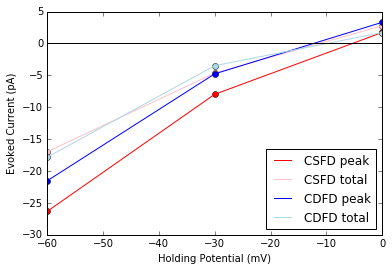

In [85]:
#Summary IV Curves:   

sac1csfs = sac1[sac1[:,1]=='CSFS',]
sac1csfd = sac1[sac1[:,1]=='CSFD',]

plt.plot(sac1csfs[:,2], ipevoked_sac1_csfs, 'bo', color='red')
plt.plot(sac1csfs[:,2], ipevoked_sac1_csfs, label= 'CSFD peak', color='red')    

plt.plot(sac1csfs[:,2], ievoked_sac1_csfs, 'bo', color='pink')
plt.plot(sac1csfs[:,2], ievoked_sac1_csfs, label= 'CSFD total', color='pink')

plt.plot(sac1csfd[:,2], ipevoked_sac1_csfd, 'bo', color='blue')
plt.plot(sac1csfd[:,2], ipevoked_sac1_csfd, label= 'CDFD peak', color='blue')

plt.plot(sac1csfd[:,2], ievoked_sac1_csfd, 'bo', color='lightblue')
plt.plot(sac1csfd[:,2], ievoked_sac1_csfd, label= 'CDFD total', color='lightblue')

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('Holding Potential (mV)')
plt.ylabel('Evoked Current (pA)')

plt.legend(loc=4)

    #    plotsweeps(fname, mylabel = str(sac5[t,1]), rawbg=0, submean=1)

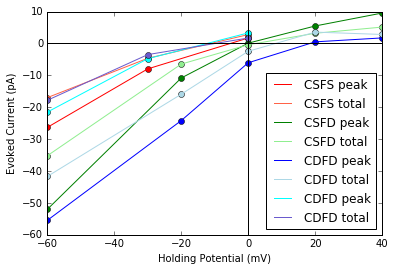

In [90]:
plt.plot(sac1csfs[:,2], ipevoked_sac1_csfs, 'bo', color='red')
plt.plot(sac1csfs[:,2], ipevoked_sac1_csfs, label= 'CSFS peak', color='red')    

plt.plot(sac1csfs[:,2], ievoked_sac1_csfs, 'bo', color='tomato')
plt.plot(sac1csfs[:,2], ievoked_sac1_csfs, label= 'CSFS total', color='tomato')


plt.plot(sac3[:,1], ipevoked_sac3, 'bo', color='green')
plt.plot(sac3[:,1], ipevoked_sac3, label= 'CSFD peak', color='green')    

plt.plot(sac3[:,1], ievoked_sac3, 'bo', color='lightgreen')
plt.plot(sac3[:,1], ievoked_sac3, label= 'CSFD total', color='lightgreen')

plt.plot(sac5[:,1], ipevoked_sac5, 'bo', color='blue')
plt.plot(sac5[:,1], ipevoked_sac5, label= 'CDFD peak', color='blue')

plt.plot(sac5[:,1], ievoked_sac5, 'bo', color='lightblue')
plt.plot(sac5[:,1], ievoked_sac5, label= 'CDFD total', color='lightblue')


plt.plot(sac1csfd[:,2], ipevoked_sac1_csfd, 'bo', color='cyan')
plt.plot(sac1csfd[:,2], ipevoked_sac1_csfd, label= 'CDFD peak', color='cyan')

plt.plot(sac1csfd[:,2], ievoked_sac1_csfd, 'bo', color='slateblue')
plt.plot(sac1csfd[:,2], ievoked_sac1_csfd, label= 'CDFD total', color='slateblue')

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('Holding Potential (mV)')
plt.ylabel('Evoked Current (pA)')

plt.legend(loc=4)

## 16-02-18

In [30]:
date = '160218'
datef2 = '16218'

##read in the file so we can see which SAC recording we are looking at
f = open('../data/ChatCreChR2/' + date + '.m')
text = f.read()
print(text)

160218 p30 ChatCre/Chr2 mouse

Light Dissection 
50mL ACSF with: 
   20uL DNQX
   50uL AP5
   100uL LAP4
   12.5uL GABAzine
   (ANTI- AcH drug?)
   
No orientation on the retina

Patch SACs, fill with ALexa 594, and then stim at diff dendritic locations 
455nm LED 


%experiment:
%In each trial:
%sweep1: hold -60
%sweep2: hold -60 1s; -40 3s; -60 0.5s
%sweep3: hold -60 1s; -20 3s; -60 0.5s
%sweep4: hold -60 1s; 0 3s; -60 0.5s
%sweep5: hold -60 1s; +20 3s; -60 0.5s

%need to run each trial 3x so we have replicate sweeps for each HP.
%need to run each experiment on center soma focus dendrites AND
%also run each experiment on center dendrites focus dendrites


SAC1
5.5mohm pipette
CM = 25
Rm = 600M
Ra 80 M
cell died before able to record. got one snapshot of it.

SAC2
5.1mohm pipette
CM = 25
Rm = 600M
Ra 80 M
% 000 - CSFD - not actually centered
showSpots_notCentered('num_trials',5,'delay_time',2,'up_time',1,'down_time' ,2,'radius',42,'spot_color',255);
showSpots('num_trials',5,'delay_tim

In [68]:
block

Block with 5 segments and 5 groups
annotations: {'abf_version': 2.2999999999999998}
file_origin: '16218001.abf'
rec_datetime: datetime.datetime(2016, 2, 18, 15, 58, 0, 387999)
# Segments
0: Segment with 1 analogs, 1 event arrays
   # Analog signals (N=1)
   0: AnalogSignal in 1.0 pA with 50000 float32 values
      name: 'Im_prime'
      channel index: 1
      sampling rate: 10000.0 Hz
      time: 1.307 s to 6.307 s
1: Segment with 1 analogs
   # Analog signals (N=1)
   0: AnalogSignal in 1.0 pA with 50000 float32 values
      name: 'Im_prime'
      channel index: 1
      sampling rate: 10000.0 Hz
      time: 1.8465 s to 6.8465 s
2: Segment with 1 analogs
   # Analog signals (N=1)
   0: AnalogSignal in 1.0 pA with 50000 float32 values
      name: 'Im_prime'
      channel index: 1
      sampling rate: 10000.0 Hz
      time: 2.3962 s to 7.3962 s
3: Segment with 1 analogs
   # Analog signals (N=1)
   0: AnalogSignal in 1.0 pA with 50000 float32 values
      name: 'Im_prime'
      channel i

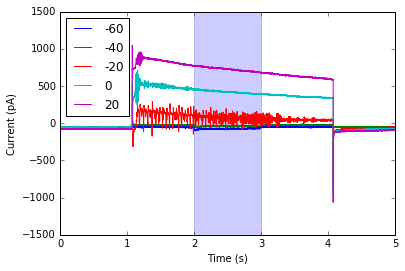

In [126]:
condition = '0' + '03'
sweeplist = ['-60','-40','-20','0','20']
fname = '../data/ChatCreChR2/' + date + ' ChR2ChatCrep30/' + datef2 + condition + '.abf'
#plotsweeps(fname, mylabel = str(sac3[t,1])+str(sac3[t,2]), rawbg=0, submean=0)
 
r = AxonIO(filename=fname)
block = r.read()[0] # read the entire file > a Block
#sigs = block.segments[sn].analogsignals

for i, seg in enumerate(block.segments):
    #grab 5 sweeps at different holding potentials
    asig = seg.analogsignals[0]
    times = asig.times.rescale('s').magnitude

    #set start time to zero
    times = times-times[0]

    plt.plot(times, asig, label=sweeplist[i])  
    
##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

#plt.xlim([1.5, 4]) 
#plt.ylim([-40, 20])
plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')

plt.legend(loc=2)
plt.show()

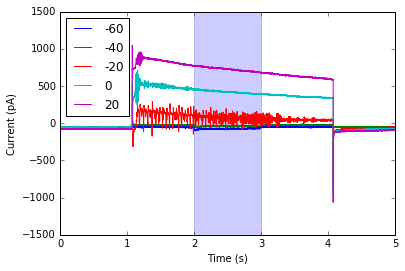

In [126]:
condition = '0' + '03'
sweeplist = ['-60','-40','-20','0','20']
fname = '../data/ChatCreChR2/' + date + ' ChR2ChatCrep30/' + datef2 + condition + '.abf'
#plotsweeps(fname, mylabel = str(sac3[t,1])+str(sac3[t,2]), rawbg=0, submean=0)
 
r = AxonIO(filename=fname)
block = r.read()[0] # read the entire file > a Block
#sigs = block.segments[sn].analogsignals

for i, seg in enumerate(block.segments):
    #grab 5 sweeps at different holding potentials
    asig = seg.analogsignals[0]
    times = asig.times.rescale('s').magnitude

    #set start time to zero
    times = times-times[0]

    plt.plot(times, asig, label=sweeplist[i])  
    
##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

#plt.xlim([1.5, 4]) 
#plt.ylim([-40, 20])
plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')

plt.legend(loc=2)
plt.show()

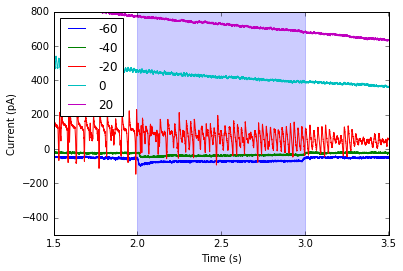

In [127]:
sweeplist = ['-60','-40','-20','0','20']
fname = '../data/ChatCreChR2/' + date + ' ChR2ChatCrep30/' + datef2 + condition + '.abf'
#plotsweeps(fname, mylabel = str(sac3[t,1])+str(sac3[t,2]), rawbg=0, submean=0)
 
r = AxonIO(filename=fname)
block = r.read()[0] # read the entire file > a Block
#sigs = block.segments[sn].analogsignals

for i, seg in enumerate(block.segments):
    #grab 5 sweeps at different holding potentials
    asig = seg.analogsignals[0]
    times = asig.times.rescale('s').magnitude

    #set start time to zero
    times = times-times[0]

    plt.plot(times, asig, label=sweeplist[i])  
    
##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

plt.xlim([1.5, 3.5]) 
plt.ylim([-500, 800])
plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')

plt.legend(loc=2)
plt.show()

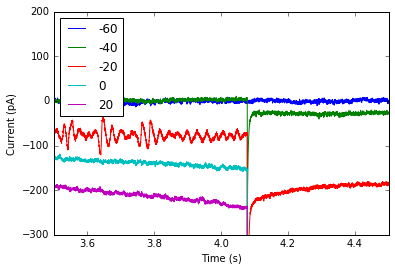

In [131]:
sweeplist = ['-60','-40','-20','0','20']
fname = '../data/ChatCreChR2/' + date + ' ChR2ChatCrep30/' + datef2 + condition + '.abf'
#plotsweeps(fname, mylabel = str(sac3[t,1])+str(sac3[t,2]), rawbg=0, submean=0)
 
r = AxonIO(filename=fname)
block = r.read()[0] # read the entire file > a Block
#sigs = block.segments[sn].analogsignals

for i, seg in enumerate(block.segments):
    #grab 5 sweeps at different holding potentials
    asig = seg.analogsignals[0]
    times = asig.times.rescale('s').magnitude

    #set start time to zero
    times = times-times[0]
    
    #mean over timepoints from 1.25s to 2.0s
    bs_start = 10000*1.25
    bs_end = 10000*2
    asig = asig - np.mean(asig[bs_start:bs_end])
    
    plt.plot(times, asig, label=sweeplist[i])  
    
##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

plt.xlim([3.5, 4.5]) 
plt.ylim([-300, 200])
plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')

plt.legend(loc=2)
plt.show()

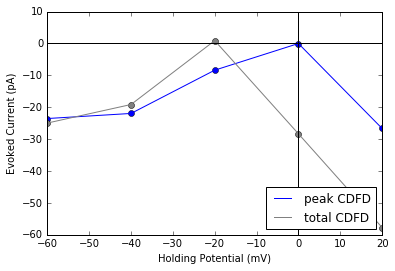

In [123]:
sweeplist = ['-60','-40','-20','0','20']
fname = '../data/ChatCreChR2/' + date + ' ChR2ChatCrep30/' + datef2 + condition + '.abf'
#plotsweeps(fname, mylabel = str(sac3[t,1])+str(sac3[t,2]), rawbg=0, submean=0)
 
ievoked = np.zeros(len(sweeplist))
ipevoked = np.zeros(len(sweeplist))
 
r = AxonIO(filename=fname)
block = r.read()[0] # read the entire file > a Block
#sigs = block.segments[sn].analogsignals


for i, seg in enumerate(block.segments):
    asig = seg.analogsignals[0]
    times = asig.times.rescale('s').magnitude

    #set start time to zero
    times = times-times[0]
    
    #mean over timepoints from 1.25s to 2.0s
    dt = 1e-4
    bs_start = int(1.25/dt)
    bs_end = int(2./dt)
    baseline = np.mean(asig[bs_start:bs_end])
    
    ##calculate total evoked current (mean over window at 2seconds - 3seconds)
    ev_start = int(2./dt)
    ev_end = int(3./dt)
    ie = np.mean(asig[ev_start:ev_end]-baseline)
    
    ##calculate evoked current (mean over window at 2seconds - 3seconds)
    peak_start = int(2./dt)
    peak_end = int(2.05/dt)
    ipe = np.mean(asig[peak_start:peak_end]-baseline)
    
    ievoked[i] = ie
    ipevoked[i] = ipe

plt.plot(sweeplist, ipevoked, 'bo', color='blue')
plt.plot(sweeplist, ipevoked, label= 'peak CDFD', color='blue')

plt.plot(sweeplist, ievoked, 'bo', color='grey')
plt.plot(sweeplist, ievoked, label= 'total CDFD', color='grey')

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('Holding Potential (mV)')
plt.ylabel('Evoked Current (pA)')

plt.legend(loc=4)

## 16-03-04

In [1]:
date = '160304'
datef2 = '2016_03_04_'

##read in the file so we can see which SAC recording we are looking at
f = open('../data/ChatCreChR2/' + date + '.m')
text = f.read()
print(text)

160218 p46 ChatCre/Chr2 mouse

Light Dissection 
50mL ACSF with: 
   20uL DNQX
   50uL AP5
   100uL LAP4
   12.5uL GABAzine
   10uL DHBE
   
No orientation on the retina

Patch SACs, fill with ALexa 594, and then stim at diff dendritic locations 
455nm LED 


%experiment:
%edited from last time because high depolarizaions (particularly -20) cause
%channels to open, which are not settled and still causing spiking in first
%3-4 seconds of holding potential. 
%Now use 10s long sweeps with a:
%1s baseline (-60 holding)
%5 second hold at HP before light
%1s light stim
%1s hold after light
%1s back to baseline (-60 holding)

%In each trial:
%sweep1: hold -60 10s
%sweep2: hold -60 1s; -40 8s; -60 0.5s
%sweep3: hold -60 1s; -20 8s; -60 0.5s
%sweep4: hold -60 1s; 0 8s; -60 0.5s
%sweep5: hold -60 1s; +20 8s; -60 0.5s

%need to wait 6s before light stim.

%need to run each trial 3x so we have replicate sweeps for each HP.
%need to run each experiment on center soma focus dendrites AND
%also run e

In [126]:
def plotavgsweeps(sweeplist, conditions_list, fnamepre, fnamepost, mylabel, stimstart, stimend, rawbg, submean):
    import numpy as np
    from quantities import kHz, ms, nA, s, uV
    from neo.io import AxonIO
    import matplotlib.pyplot as plt  
    
    fnames = [fnamepre + condition + fnamepost for condition in conditions_list]

#   print fnames
    
    r_list = [AxonIO(filename=fname) for fname in fnames]
    blocks = [r.read()[0] for r in r_list] # read the entire file > a Block
    
    srate = int(blocks[0].segments[0].analogsignals[0].sampling_rate)
    
    #plotter function
    def grabsweep(bl, nsweep, sm, alp):
        asig = bl.segments[nsweep].analogsignals[0]
        if(sm):
            ##how many timepoints to include in baseline
            baseline = 1000
            asig = asig - np.mean(asig[stimstart*srate-baseline:stimstart*srate])
        times = asig.times.rescale('s').magnitude
        #set start time to zero
        times = times-times[0]
        #asig = asig.rescale('pA').magnitude
        plt.plot(times, asig, alpha=alp, color='grey')
        
    #go over all holding potentials
    for i, hp in enumerate(sweeplist):
#       print i
        #plot all the raw sweeps if we want to
        if(rawbg):
            for block in blocks:
                for j, seg in enumerate(block.segments):
                    grabsweep(block, j, submean, 0.1)

        #calculate & plot the average of each sweep number for all blocks
        sigs = [block.segments[i].analogsignals[0] for block in blocks]
        avg = np.mean(sigs, axis=0)
    
        if(submean):
            baseline = 1000
            avg = avg - np.mean(avg[stimstart*srate-baseline:stimstart*srate])
        #rescale time to always start at 0    
        times = block.segments[0].analogsignals[0].times.rescale('s').magnitude
        times = times-times[0]
        #print(avg)
        
        plt.plot(times, avg, label = sweeplist[i])

/Users/vgd/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:44: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


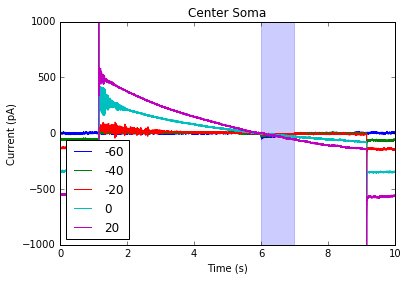

In [137]:
sweeplist = ['-60','-40','-20','0','20']
cs_conditions = ['0003','0004','0005']
cd_conditions = ['0006','0007','0008']

fnamepre = '../data/ChatCreChR2/' + date + ' ChR2ChatCrep46/' + datef2 
fnamepost = '.abf'
mylabel = ''
stimstart = 6.
stimend = 7.
rawbg = 0
submean = 1
fullsweep = 1

plotavgsweeps(sweeplist, cs_conditions, fnamepre, fnamepost, mylabel, stimstart, stimend, rawbg, submean)

##show limits of stimulation
plt.axvspan(stimstart, stimend, alpha=0.2, color='blue')

#choose how much of sweep to plot (x and y limits)
if(fullsweep):
    plt.xlim([0, 10]) 
    plt.ylim([-1000, 1000])
elif not(submean):
    plt.xlim([5.5, 7.5]) 
    plt.ylim([-200, 500])
elif(submean):
    plt.xlim([5.5, 7.5]) 
    plt.ylim([-70, 30])

plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')

plt.title('Center Soma')

if not(rawbg):
    plt.legend(loc=3)
    plt.show()


/Users/vgd/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:44: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


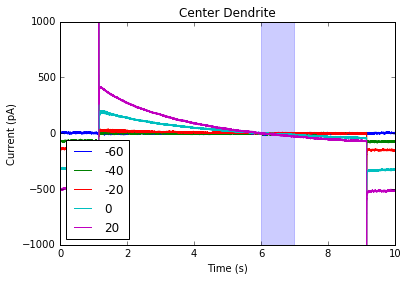

In [139]:
sweeplist = ['-60','-40','-20','0','20']
cs_conditions = ['0003','0004','0005']
cd_conditions = ['0006','0007','0008']

fnamepre = '../data/ChatCreChR2/' + date + ' ChR2ChatCrep46/' + datef2 
fnamepost = '.abf'
mylabel = ''
stimstart = 6.
stimend = 7.
rawbg = 0
submean = 1
fullsweep = 1

#call function to average over the sweeps of the same holding potential
plotavgsweeps(sweeplist, cd_conditions, fnamepre, fnamepost, mylabel, stimstart, stimend, rawbg, submean)

##show limits of stimulation
plt.axvspan(stimstart, stimend, alpha=0.2, color='blue')

#choose how much of sweep to plot (x and y limits)
if(fullsweep):
    plt.xlim([0, 10]) 
    plt.ylim([-1000, 1000])
elif not(submean):
    plt.xlim([5.5, 7.5]) 
    plt.ylim([-200, 500])
elif(submean):
    plt.xlim([5.5, 7.5]) 
    plt.ylim([-70, 30])

plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')

plt.title('Center Dendrite')

if not(rawbg):
    plt.legend(loc=3)
    plt.show()

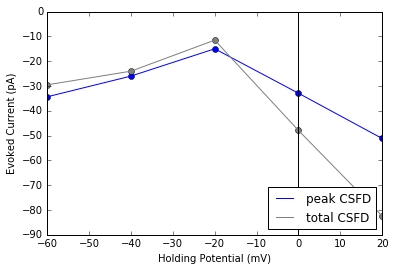

In [134]:
sweeplist = ['-60','-40','-20','0','20']
cs_conditions = ['0003','0004','0005']
cd_conditions = ['0006','0007','0008']

fname = '../data/ChatCreChR2/' + date + ' ChR2ChatCrep46/' + datef2 + cs_conditions[1] + '.abf'
#plotsweeps(fname, mylabel = str(sac3[t,1])+str(sac3[t,2]), rawbg=0, submean=0)
 
ievoked = np.zeros(len(sweeplist))
ipevoked = np.zeros(len(sweeplist))
 
r = AxonIO(filename=fname)
block = r.read()[0] # read the entire file > a Block
#sigs = block.segments[sn].analogsignals


for i, seg in enumerate(block.segments):
    asig = seg.analogsignals[0]
    times = asig.times.rescale('s').magnitude

    #set start time to zero
    times = times-times[0]
    
    #mean over timepoints from 1.25s to 2.0s
    srate = asig.sampling_rate
    bs_start = int(5.*srate)
    bs_end = int(5.25*srate)
    baseline = np.mean(asig[bs_start:bs_end])
    
    ##calculate total evoked current (mean over window at 6seconds - 7seconds)
    ev_start = int(6.*srate)
    ev_end = int(7.*srate)
    ie = np.mean(asig[ev_start:ev_end]-baseline)
    
    ##calculate evoked current (mean over window at 2seconds - 3seconds)
    peak_start = int(6.*srate)
    peak_end = int(6.05*srate)
    ipe = np.mean(asig[peak_start:peak_end]-baseline)
    
    ievoked[i] = ie
    ipevoked[i] = ipe

plt.plot(sweeplist, ipevoked, 'bo', color='blue')
plt.plot(sweeplist, ipevoked, label= 'peak CSFD', color='blue')

plt.plot(sweeplist, ievoked, 'bo', color='grey')
plt.plot(sweeplist, ievoked, label= 'total CSFD', color='grey')

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('Holding Potential (mV)')
plt.ylabel('Evoked Current (pA)')

plt.legend(loc=4)

In [135]:
def plotavgiv(sweeplist, conditions_list, fnamepre, fnamepost, mylabel, stimstart, stimend, rawbg, submean):
    import numpy as np
    from quantities import kHz, ms, nA, s, uV
    from neo.io import AxonIO
    import matplotlib.pyplot as plt  
    
    fnames = [fnamepre + condition + fnamepost for condition in conditions_list]

#   print fnames
    
    r_list = [AxonIO(filename=fname) for fname in fnames]
    blocks = [r.read()[0] for r in r_list] # read the entire file > a Block
    
    srate = int(blocks[0].segments[0].analogsignals[0].sampling_rate)
    
    def grabsweep(bl, nsweep, sm, alp):
        asig = bl.segments[nsweep].analogsignals[0]
        if(sm):
            ##how many timepoints to include in baseline
            baseline = 1000
            asig = asig - np.mean(asig[stimstart*srate-baseline:stimstart*srate])
        times = asig.times.rescale('s').magnitude
        #set start time to zero
        times = times-times[0]
        #asig = asig.rescale('pA').magnitude
        plt.plot(times, asig, alpha=alp, color='grey')
    
        
    #go over all holding potentials
    for i, hp in enumerate(sweeplist):
#       print i
        #plot all the raw sweeps if we want to
        if(rawbg):
            for block in blocks:
                for j, seg in enumerate(block.segments):
                    grabsweep(block, j, submean, 0.1)

        #calculate & plot the average of each sweep number for all blocks
        sigs = [block.segments[i].analogsignals[0] for block in blocks]
        avg = np.mean(sigs, axis=0)
    
        if(submean):
            baseline = 1000
            avg = avg - np.mean(avg[stimstart*srate-baseline:stimstart*srate])
        #rescale time to always start at 0    
        times = block.segments[0].analogsignals[0].times.rescale('s').magnitude
        times = times-times[0]
        #print(avg)
        plt.plot(times, avg, label = mylabel)